In [30]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import LeaveOneOut, GroupKFold, cross_val_score
from sklearn.model_selection import KFold




In [31]:

#loading the dataset
dataset = pd.read_csv("/content/archive (2).zip")
dataset.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
dataset.shape

(20640, 10)

In [33]:
dataset = pd.get_dummies(dataset, columns = ['ocean_proximity'])
dataset.shape

(20640, 14)

In [34]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

In [35]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [36]:
dataset.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_<1H OCEAN,0


In [37]:
dataset['total_bedrooms'] = dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean())

print(dataset.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


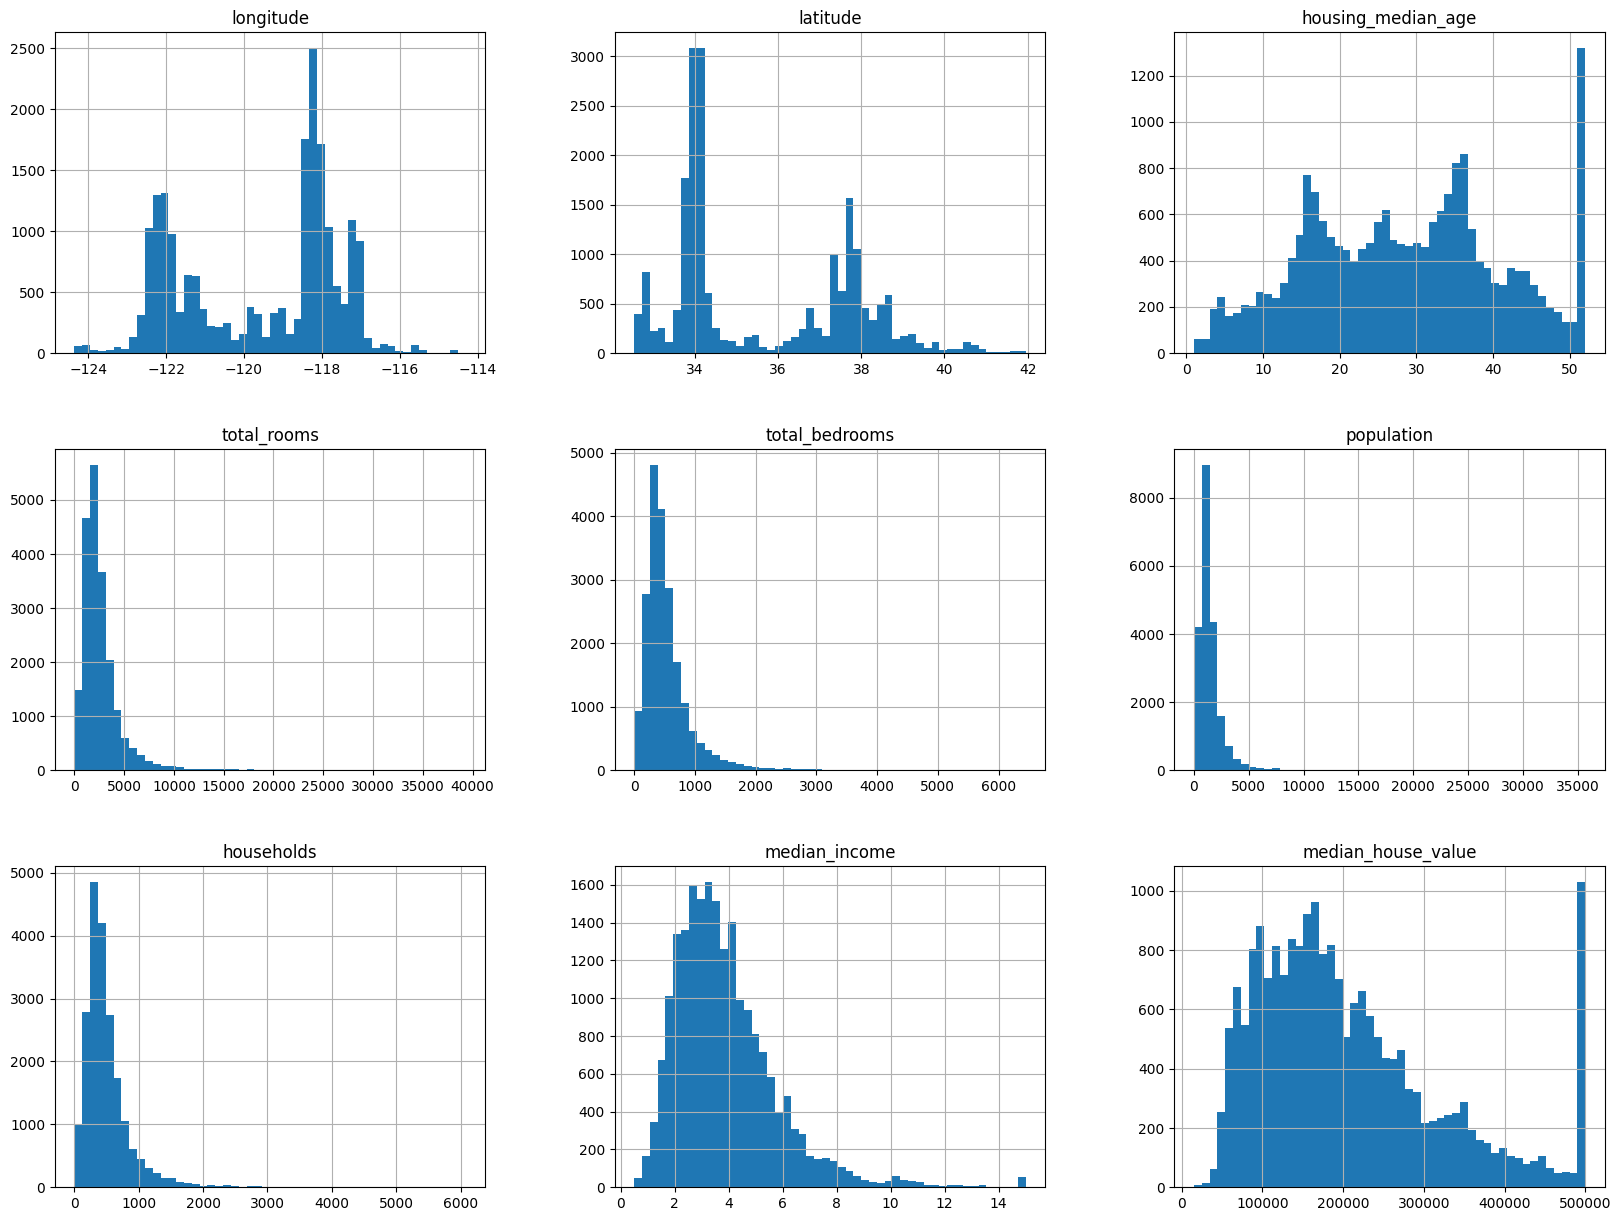

In [38]:
#visualizing the data using plots
dataset.hist(bins = 50, figsize = (20,15))
plt.show()

In [39]:
correlation_matrix = dataset.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.018220,-0.006433,-0.004361,-0.019785,0.000676
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018220,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


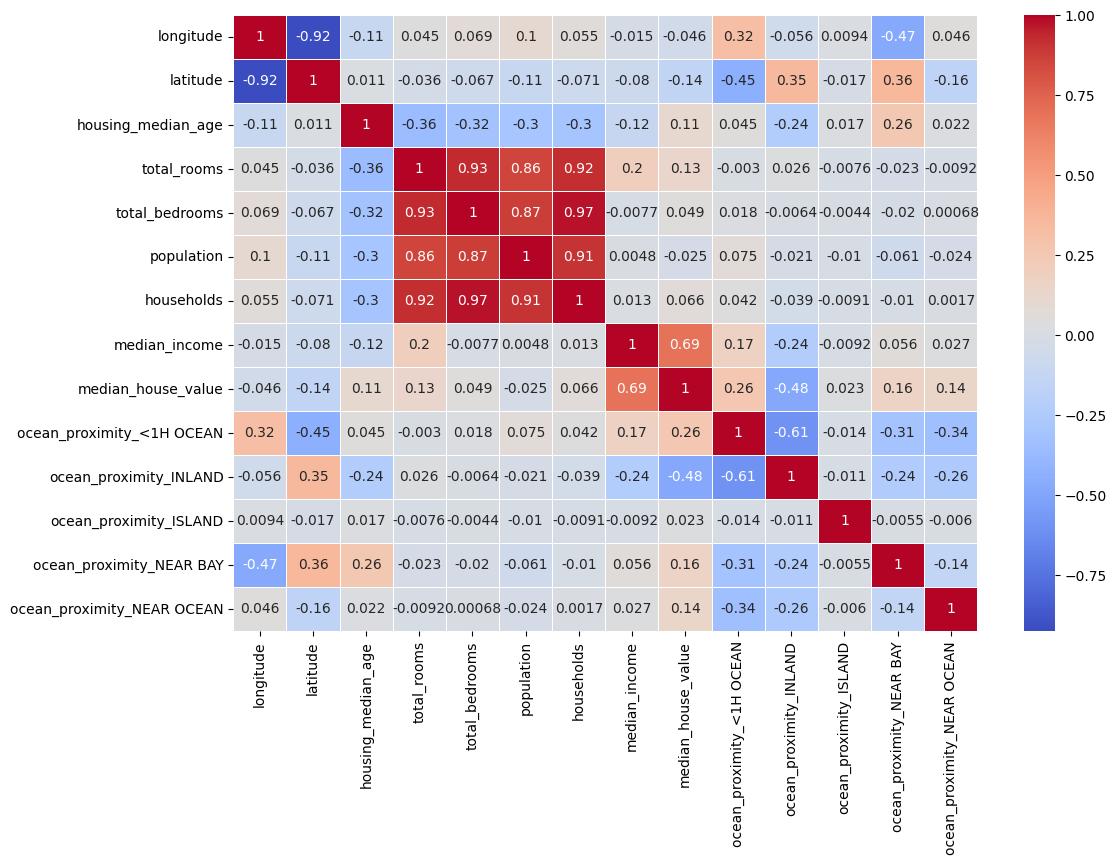

In [40]:
corr_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

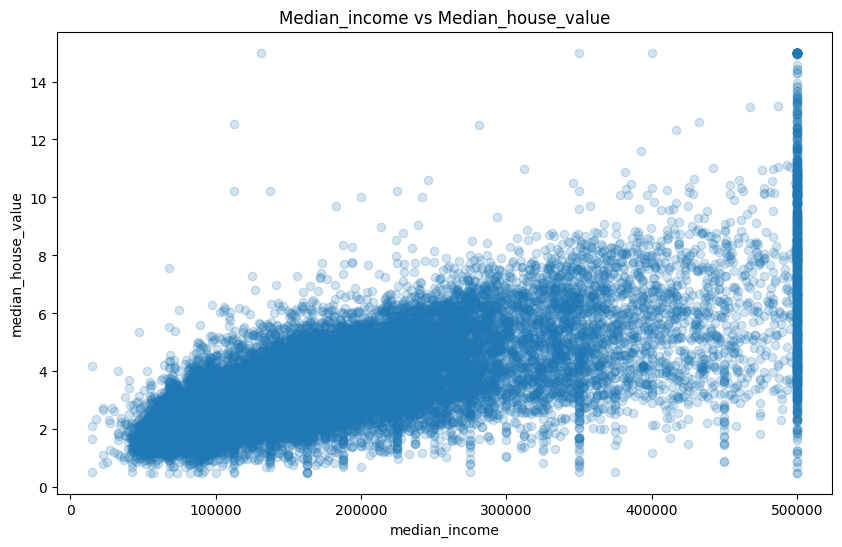

In [41]:
plt.figure(figsize = (10,6))
plt.scatter(dataset['median_house_value'], dataset['median_income'], alpha=0.2)
plt.ylabel('median_house_value')
plt.xlabel('median_income')
plt.title('Median_income vs Median_house_value')
plt.show()


In [42]:
dataset.skew()

,0
longitude,-0.297801
latitude,0.465953
housing_median_age,0.060331
total_rooms,4.147343
total_bedrooms,3.477023
population,4.935858
households,3.410438
median_income,1.646657
median_house_value,0.977763
ocean_proximity_<1H OCEAN,0.230999


In [43]:
dataset['total_rooms'] = np.log1p(dataset['total_rooms'])
dataset['total_bedrooms'] = np.log1p(dataset['total_bedrooms'])
dataset['population'] = np.log1p(dataset['population'])
dataset['households'] = np.log1p(dataset['households'])
dataset['median_income'] = np.log1p(dataset['median_income'])
dataset['median_house_value'] = np.log1p(dataset['median_house_value'])

dataset.skew()

,0
longitude,-0.297801
latitude,0.465953
housing_median_age,0.060331
total_rooms,-1.075533
total_bedrooms,-1.005686
population,-1.044087
households,-1.051607
median_income,0.226083
median_house_value,-0.173166
ocean_proximity_<1H OCEAN,0.230999


In [44]:
pt = PowerTransformer(method = 'yeo-johnson', standardize=False)
features = ['longitude','total_rooms','total_bedrooms','population','households','median_house_value']
dataset[features] = pt.fit_transform(dataset[features])
dataset.skew()

,0
longitude,0.000000
latitude,0.465953
housing_median_age,0.060331
total_rooms,0.163101
total_bedrooms,0.153499
population,0.144822
households,0.146945
median_income,0.226083
median_house_value,-0.019058
ocean_proximity_<1H OCEAN,0.230999


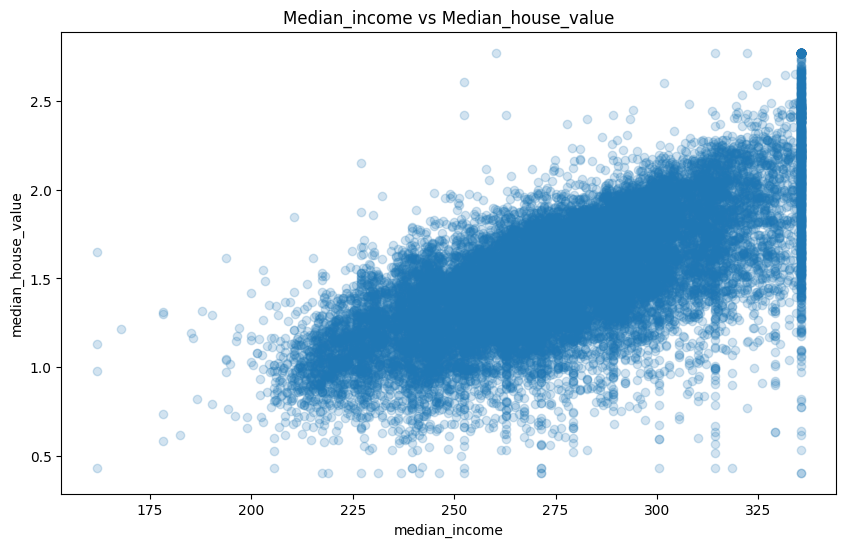

In [45]:
plt.figure(figsize = (10,6))
plt.scatter(dataset['median_house_value'], dataset['median_income'], alpha=0.2)
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Median_income vs Median_house_value')
plt.show()

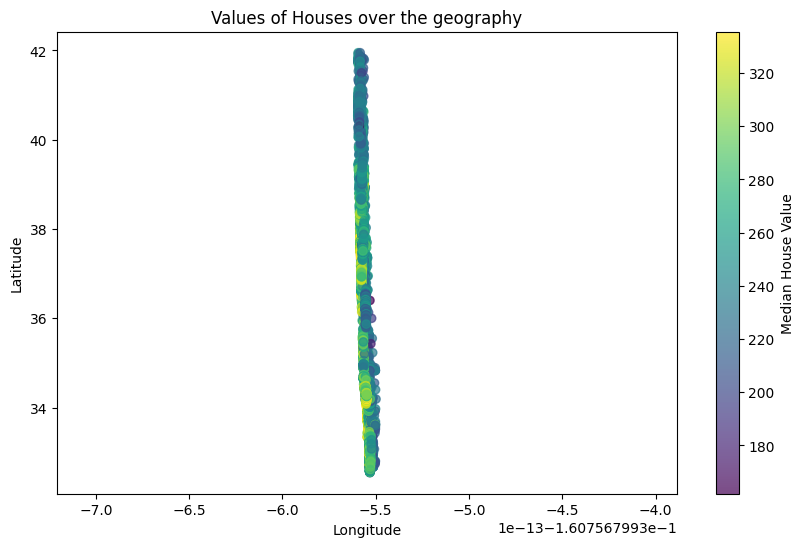

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(dataset['longitude'], dataset['latitude'], alpha=0.7, c=dataset['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Values of Houses over the geography')
plt.show()

In [47]:
#feature selection
X= dataset[['median_income', 'total_rooms', 'population', 'households']]
Y = dataset['median_house_value']

In [48]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
#splitting the dataset into train and split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [50]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [51]:
#predicting the values
Y_pred = model.predict(X_test)

In [55]:
#evaluating the data
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, Y, cv=kfold, scoring='neg_mean_squared_error')
print(f'k-Folds Cross-Validation: {scores}')
rmse_scores = np.sqrt(-scores)
print("RMSE scores:", rmse_scores)

Mean Squared Error: 421.209468560602
Mean Absolute Error: 15.91212953087608
R-squared: 0.5481777586713192
k-Folds Cross-Validation: [-421.20946856 -415.42148816 -398.35262523 -398.49094041 -425.36278609]
RMSE scores: [20.52338833 20.38189118 19.95877314 19.96223786 20.62432511]


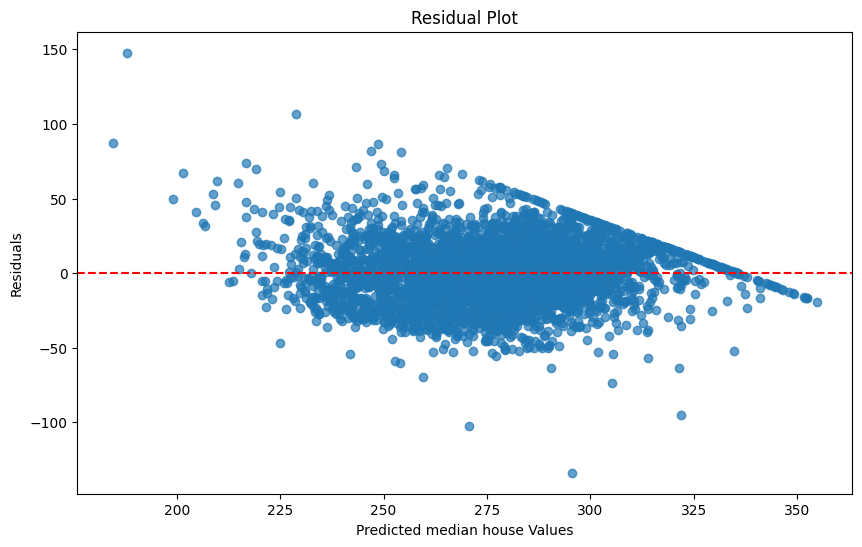

In [53]:
#plot of the regression line
residuals = Y_test - Y_pred

plt.figure(figsize=(10,6))
plt.scatter(Y_pred, residuals, alpha = 0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted median house Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()